In [1]:
from matplotlib import pyplot as plt 
import numpy as np 
from math import sin, exp, cos, sqrt
from scipy.optimize import minimize 

# МИНИМИЗАЦИЯ ФУНКЦИЙ

## Вариант 24. 

$ \varepsilon = 10^{-6} $
$$ f(x) = sin(x) + e ^{-x^2} $$

$$ [a, b] = [-1.0, 2.0]$$

### Метод Ньютона. 

#### Поиск минимума. 
Метод Ньютона - итерационный численный метод нахождения  экстремума функции. 
Минимизируемая функция должна быть дважды непрерывно дифференцируема. 
В точке Минимума: $ f'(x)=0 $, $ f''(x)>0 $.
Итерации алгоритма:
$$ x^{(n+1)} = x^{(n)} - \frac{f'(x^{(n)})}{f''(x^{(n)})}$$
Критерий окончания метода: 
$$ |x^{(n+1)} -   x^{(n)} | < \varepsilon$$

Для работы с методам нужны производные. 
$$ f'(x) = cos(x) - 2xe^{-x^2}$$
$$ f''(x)  = -sin(x) + 4x^2e^{-x^2} - 2e^{-x^2} $$

In [2]:
x = np.linspace(-1.0,2.0, 200)

f_x = np.exp(-np.square(x)) + np.sin(x) # вектор значений функции для рисовки 

def f(x):
    #функция 
    return exp(-x*x)+sin(x)

Text(0.5, 1.0, 'f(x) на [−1.0,2.0]')

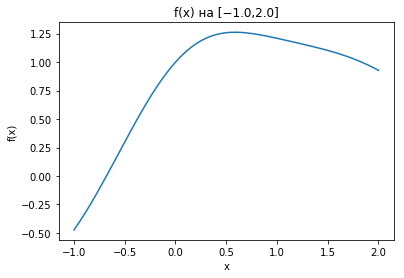

In [3]:
plt.plot(x, f_x,  )
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("f(x) на [−1.0,2.0]")


Text(0.5, 1.0, 'f(x) Поближе')

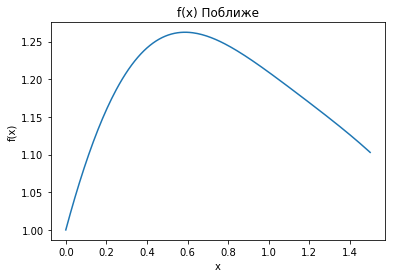

In [4]:
x = np.linspace(0.0, 1.5, 200)

f_x = np.exp(-np.square(x)) + np.sin(x)

plt.plot(x, f_x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("f(x) Поближе")



По графику видно, что на отрезке [−1.0,2.0] есть одна точка экстремума - максимум. Чтобы найми максимум будем минимизировать функцию g(x) = -f(x) методом Ньютона. 

$$ g(x) = -sin(x) - e ^{-x^2} $$
$$ g'(x) = -cos(x) + 2xe^{-x^2}$$
$$ g''(x)  =  sin(x) -4x^2e^{-x^2} + 2e^{-x^2} $$

In [5]:
def g(x):
    #функция -f(x) 
    return -exp(-x*x)-sin(x)

def g_der_1(x):
    # первая производная g 
    return -cos(x)+2*x*exp(-x*x)

def g_der_2(x):
    # вторая производная g
    return sin(x)-4*x*x*exp(-x*x)+2*exp(-x*x)

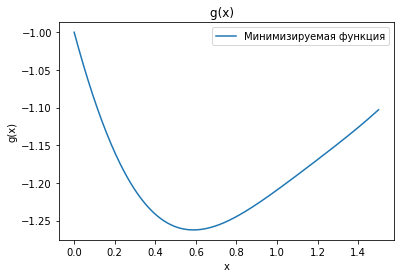

In [6]:

g_x = -1*np.exp(-np.square(x)) - np.sin(x)

plt.plot(x, g_x, label = "Минимизируемая функция")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.title("g(x)  ")
plt.legend()

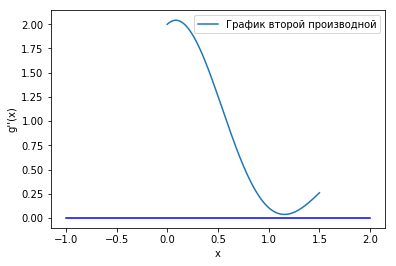

In [7]:
der_plot = np.zeros(200)
for i in range(200):
    der_plot[i] = g_der_2(x[i])


plt.plot(x, der_plot, label = "График второй производной")
plt.xlabel("x")
plt.ylabel("g''(x)") 
plt.plot([-1, 2], [0,0], "-", color="b")
plt.legend()

Непрерывная функция y=f(x) называется унимодальной на отрезке [a,b], если:
1. точка $x_0$ локального минимума функции принадлежит отрезку [a,b];
2. для любых двух точек отрезка $ x_1,x_2,$ взятых по одну сторону от точки минимума, точке, более близкой к точке минимума соответствует меньшее значение функции; то есть из условий $x_2<x_1<x_0 $ или $x_0<x_1<x_2$  следует условие f$(x_1)<f(x_2)$. 

По графику видно, что функция g(x) является унимодальной на части отрезка  [−1.0,2.0] (а еще об унимодальности сказано в условии задачи). Внутри этого отрезка в окрестностях точки x=0.6, около которой минимум функции,  вторая производная положительная - необходимое условие для поиска минимума. Примем за $x_0 = 0.6 $ и применим метод Ньютона. 

In [8]:
def newton (f, x0, eps=1e-6):
    #функция реализации метода 
    xk = x0 - g_der_1(x0)/g_der_2(x0) # первый шаг 
    
    k=1
    while(abs(xk - x0)>eps): # кртитерий выхода 
        x0 = xk
        xk =  x0 - g_der_1(x0)/g_der_2(x0)
        k=k+1
        
    print("Было сделано ", k , "итераций ")
        
    return x0 
    
    

In [9]:
mini = newton(g, 0.6)
print("Полученный результат: ", mini )
print("Значение функции в точке минимума: ", g(mini))
scipy_res = minimize(g, 0.6)
print("Погрешность по сравнению с результатом scipy: ", abs(scipy_res.x-mini))
f_max = -1 * g(mini)
print("Значение исходной функции в точке максимума: ", f_max)

Было сделано  3 итераций 
Полученный результат:  0.5878022945630093
Значение функции в точке минимума:  -1.2623916827962156
Погрешность по сравнению с результатом scipy:  [5.98090655e-06]
Значение исходной функции в точке максимума:  1.2623916827962156


Точность найденного решения соответствует заданной. 
Было сделано всего три итерации. Причина - метод быстро сходится.

### Задание 2.

$$ f(t) = \frac{t^2-t-1}{t^2+t+5}$$
$$ [a, b] = [-1, 2] $$

#### Метод золотого сечения. 

Метод золотого сечения — метод поиска экстремума действительной функции одной переменной на заданном отрезке. В основе метода лежит принцип деления отрезка в пропорциях золотого сечения. 
  
  Говорят, что точка x осуществляет золотое сечение отрезка $[a, \quad b]$, если  
  $$\frac{b-a}{b-x}=\frac{b-x}{x-a}=\phi=\frac{1+\sqrt{5} }{2} $$



В качестве $x_1 $ и $ x_2$ выберем точку золотого сечения отрезка и симметричную ей. Если $a<x_1<x_2<b$, то при указанном выборе точек получаем, что $x_1$ - точка золотого сечения отрезка$ [a, \quad x_2],$ а $ x_2 $- точка золотого сечения отрезка $[x_1, \quad b]$. 
##### Описание метода

 $\varepsilon = 10^{-6}$ -  погрешность метода.

 $x_1 = b-\frac{b-a}{\phi}, \quad x_2 = a+\frac{b-a}{\phi}$

Итерации:
Если $ f(x_1) > f(x_2) $, то $ a=x_1, \quad x_1=x_2, \quad x_2=b-(x_1-a); $

Если $f(x_1) < f(x_2),$ то $b=x_2, \quad x_2=x_1, \quad x_1=a+(b-x_2); $

Критерий выхода: $ (b-a) <  \epsilon  $

Решение: $\tilde{x}^{\ast}=\frac{a+b}{2}.$


In [10]:
def f(t):
    # сама функция 
    return (t*t-t-1)/(t*t+t+5.0)

Text(0.5, 1.0, 'f(x)  ')

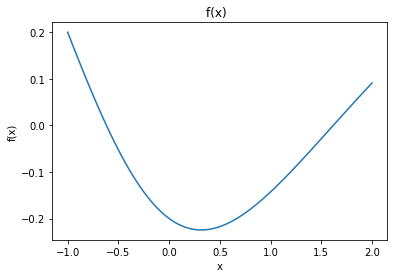

In [11]:
x = np.linspace(-1.0,2.0, 100)

f_x = np.apply_along_axis(f, 0, x)
plt.plot(x, f_x   )
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("f(x)  ")

Будем искать минимум. 

In [12]:
def minimize_g(f, a, b, eps=1e-6):
    # реализация метода 
    k=0
    while((b-a)>eps):
        k=k+1
        x1 =float (b - (b-a)/(  (1+sqrt(5.0))/2.0) )
        x2 = a + (b-a)/(  (1+sqrt(5.0))/2.0) 


        y1 = f(x1)
        y2 = f(x2)

        if( y1>y2):
            a = x1 # меняем границу 

        else:
            b = x2 
# код можно улучшить, сохраняя предыдущие значения, но так тоже все нормально работает   
        
    print("Было сделано ", k , "итераций ")    
    

    return (a+b)/2.0

In [13]:
w = minimize_g(f, -1.0, 2.0)
print("Полученное решение t = ", w )
print("Значение в точке найденного минимума: ", f(w))
scipy_res = minimize(f, 0.4)
print("Погрешность по сравнению с результатом scipy: ", abs(scipy_res.x-w))

Было сделано  31 итераций 
Полученное решение t =  0.31662463988209516
Значение в точке найденного минимума:  -0.22455258744323697
Погрешность по сравнению с результатом scipy:  [1.92866299e-07]


Реализованный метод позволил найти минимум с заданной точностью. 